#Alexnet

In [ ]:
import tensorflow as tf
import pandas as pd 
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

from tensorflow.keras import models, layers
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Flatten, Reshape, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Dense, Concatenate, Add, Reshape, Dot
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/tomato-leaf-disease/tomato_dataset'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS   = 3

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_path="/kaggle/input/tomato-leaf-disease/tomato_dataset/train"
valid_path="/kaggle/input/tomato-leaf-disease/tomato_dataset/valid"
test_path="/kaggle/input/tomato-leaf-disease/tomato_dataset/test"

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                              batch_size = BATCH_SIZE,
                                              class_mode = 'categorical',
                                              shuffle=True)

valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                             shuffle=True)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                           shuffle=True)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [ ]:
alexnet_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='loss'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.75
                                            , min_lr=0.00001)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
alexnet_model.compile(optimizer = Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=["accuracy"]
)

epochs = 20

# train_num = train_set.samples  # num of training samples
# valid_num = valid_set.samples  # num of validation samples

alexnet_history = alexnet_model.fit(train_set,
                                steps_per_epoch=len(train_set),  
                                validation_data=valid_set,
                                epochs=epochs,
                                callbacks=[learning_rate_reduction],
                                validation_steps=len(valid_set),
                                verbose=1,
                            )

Epoch 1/20
574/574 [==============================] - 411s 692ms/step - loss: 3.6769 - accuracy: 0.4130 - val_loss: 4.7839 - val_accuracy: 0.1854 - lr: 0.0010
Epoch 2/20
574/574 [==============================] - 299s 521ms/step - loss: 1.4620 - accuracy: 0.5398 - val_loss: 2.7745 - val_accuracy: 0.2532 - lr: 0.0010
Epoch 3/20
574/574 [==============================] - 301s 524ms/step - loss: 1.2301 - accuracy: 0.6176 - val_loss: 3.2241 - val_accuracy: 0.2953 - lr: 0.0010
Epoch 4/20
574/574 [==============================] - 304s 530ms/step - loss: 1.1290 - accuracy: 0.6534 - val_loss: 1.0767 - val_accuracy: 0.6377 - lr: 0.0010
Epoch 5/20
574/574 [==============================] - 304s 529ms/step - loss: 1.0072 - accuracy: 0.6988 - val_loss: 0.9317 - val_accuracy: 0.7180 - lr: 0.0010
Epoch 6/20
574/574 [==============================] - 298s 520ms/step - loss: 0.8791 - accuracy: 0.7339 - val_loss: 1.8619 - val_accuracy: 0.4914 - lr: 0.0010
Epoch 7/20
574/574 [==========================

In [ ]:
scores1 = alexnet_model.evaluate(valid_set)
scores1

144/144 [==============================] - 15s 105ms/step - loss: 1.6038 - accuracy: 0.6585


[1.6037733554840088, 0.658451497554779]

In [ ]:
scores2 = alexnet_model.evaluate(test_set)
scores2

2/2 [==============================] - 1s 733ms/step - loss: 1.3268 - accuracy: 0.7200


[1.3267529010772705, 0.7200000286102295]

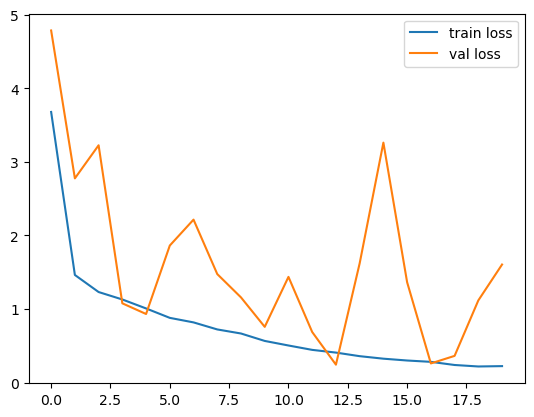

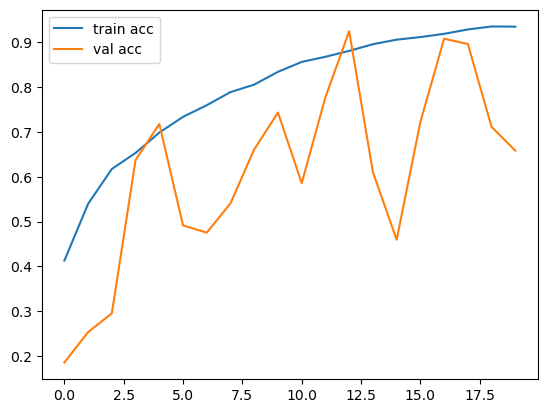

In [ ]:
# Plot the Loss and Accuracy
# Loss
plt.plot(alexnet_history.history['loss'], label='train loss')
plt.plot(alexnet_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(alexnet_history.history['accuracy'], label='train acc')
plt.plot(alexnet_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
class_names = list(train_set.class_indices.keys())
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


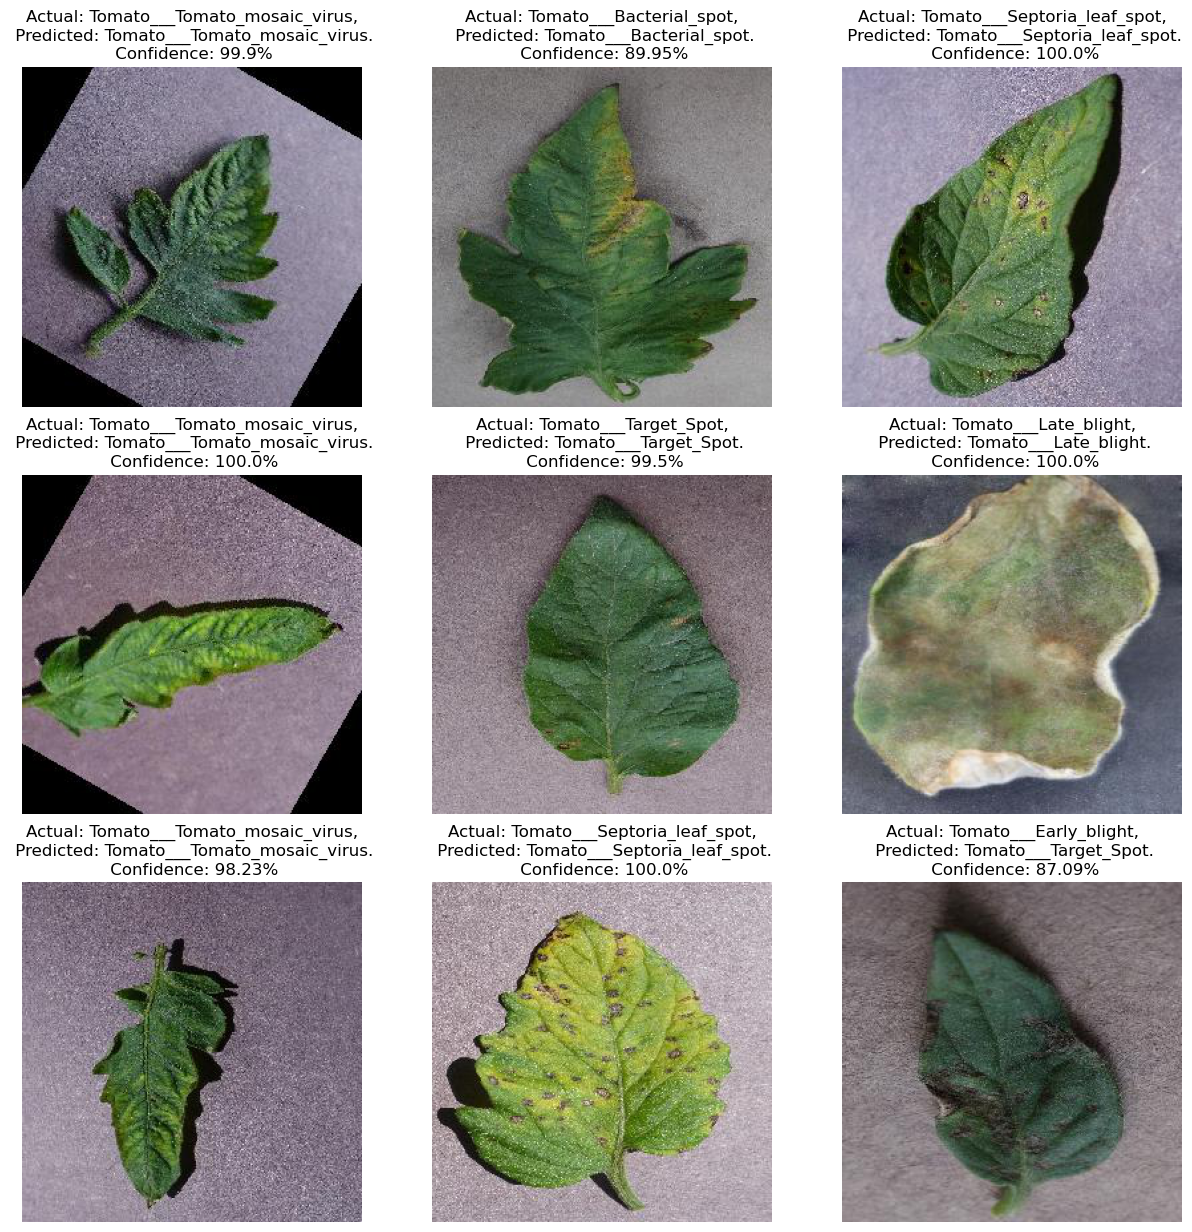

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(alexnet_model, images[i])
        index = labels[i].argmax(axis=0)
        actual_class = class_names[index] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break


In [ ]:
from sklearn.metrics import classification_report

x_val, y_val = valid_set.next()

y_pred = alexnet_model.predict(x_val).round()
target_names = [f"{class_names[i]}" for i in range(10)]
print(classification_report(y_val, y_pred, target_names=target_names))

1/1 [==============================] - 0s 53ms/step
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       1.00      0.33      0.50         3
                        Tomato___Early_blight       1.00      0.33      0.50         3
                         Tomato___Late_blight       0.00      0.00      0.00         3
                           Tomato___Leaf_Mold       0.00      0.00      0.00         0
                  Tomato___Septoria_leaf_spot       0.50      1.00      0.67         4
Tomato___Spider_mites Two-spotted_spider_mite       1.00      0.17      0.29         6
                         Tomato___Target_Spot       0.57      1.00      0.73         4
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.00      0.00      0.00         1
                 Tomato___Tomato_mosaic_virus       0.75      0.75      0.75         4
                             Tomato___healthy       1.00      0.75      0.86 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
alexnet_model.save('alexnet_model.h5')